In [1]:
# program uses an artificial recurrent neural network called long short term memory(LSTM) to predict closing stock price of corporation using the past 60 day stock price
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt


In [2]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [3]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-10-21')

# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610313
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678082
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818836
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952843
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932296
...,...,...,...,...,...,...
2021-10-15,144.899994,143.509995,143.770004,144.839996,67885200.0,144.839996
2021-10-18,146.839996,143.160004,143.449997,146.550003,85589200.0,146.550003
2021-10-19,149.169998,146.550003,147.009995,148.759995,76378900.0,148.759995


In [4]:
# get the no. of rows and columns
df.shape

(2468, 6)

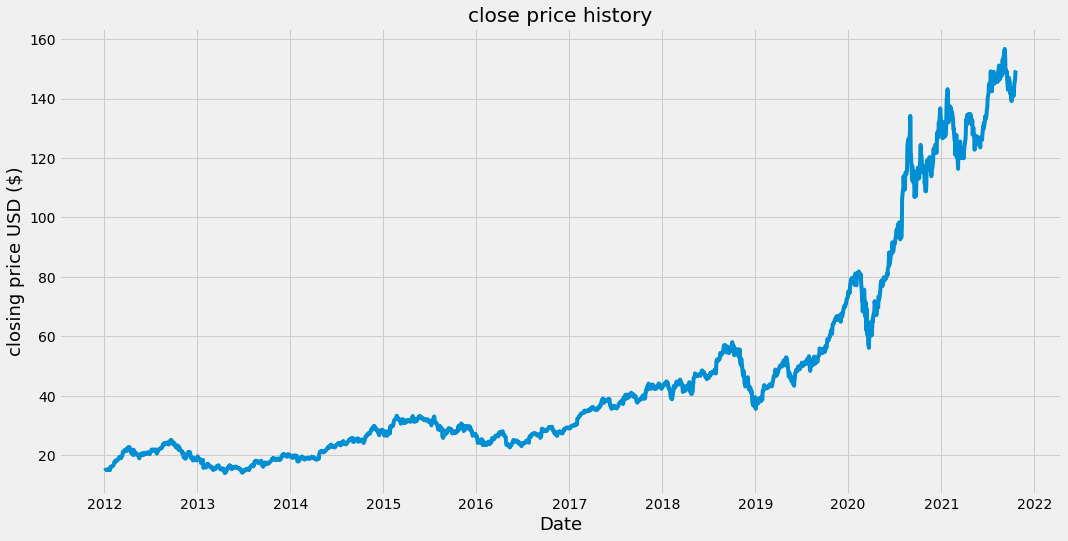

In [5]:
# visualize the closing price history
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('closing price USD ($)', fontsize=18)
plt.show()

In [10]:
# create a new dataframe with only the close column
data = df.filter(['Close'])

# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

# convert the dataframe to a numpy array
dataset = data.values
dataset

array([[ 14.6867857 ],
       [ 14.76571369],
       [ 14.92964268],
       ...,
       [148.75999451],
       [149.25999451],
       [149.47999573]])

In [7]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00517915],
       [0.00573209],
       [0.00688052],
       ...,
       [0.94444536],
       [0.94794817],
       [0.94948942]])

In [8]:
# create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len]

# split the data into x_train and y_train data sets
x_train = []
y_train = []

In [11]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i==60:
        print(x_train)
        print(y_train)
        print()

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00744847, 0.0092274 , 0.007476  ,
       0.01404377, 0.01353586, 0.0141989 , 0.01563254, 0.01650074,
       0.01642818, 0.01616047, 0.01730138, 0.01837474, 0.01959072,
       0.0215548 , 0.02568061, 0.02574316, 0.02804001, 0.02975638,
       0.02680652, 0.02794242, 0.02791991, 0.03110496, 0.03065209,
       0.03149026, 0.03299647, 0.03383465, 0.03624909, 0.03800799,
       0.0385159 , 0.03869355, 0.03568614, 0.03496055, 0.03506814,
       0.03789542, 0.03869105, 0.04039993, 0.04442815, 0.04980247,
       0.04879666, 0.04879916, 0.05268478, 0.05390076, 0.05303505,
       0.05224443, 0.05142127, 0.05415595, 0.05603247, 0.0568181 ])]
[0.05487653421186173]



In [13]:
# convert the x_train and y_train to numpy array
x_train  , y_train = np.array(x_train), np.array(y_train)

In [14]:
# reshape the data beacause lstm axpect three dimentional data 
x_train.shape

(1915, 60)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1915, 60, 1)

In [16]:
# build the lSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1915/1915 [==============================] - 64s 31ms/step - loss: 2.2896e-04


In [19]:
# create the testing data set
# create the new array containing scaled values from index 1916 to 2468
test_data = scaled_data[training_data_len-60: , : ]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , : ]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60 : i, 0])
    

In [20]:
# convert the data to a numpy array
x_test = np.array(x_test)


In [21]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

5.2656830329198625

C:\Users\lalit\AppData\Local\Temp/ipykernel_16912/1690353125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


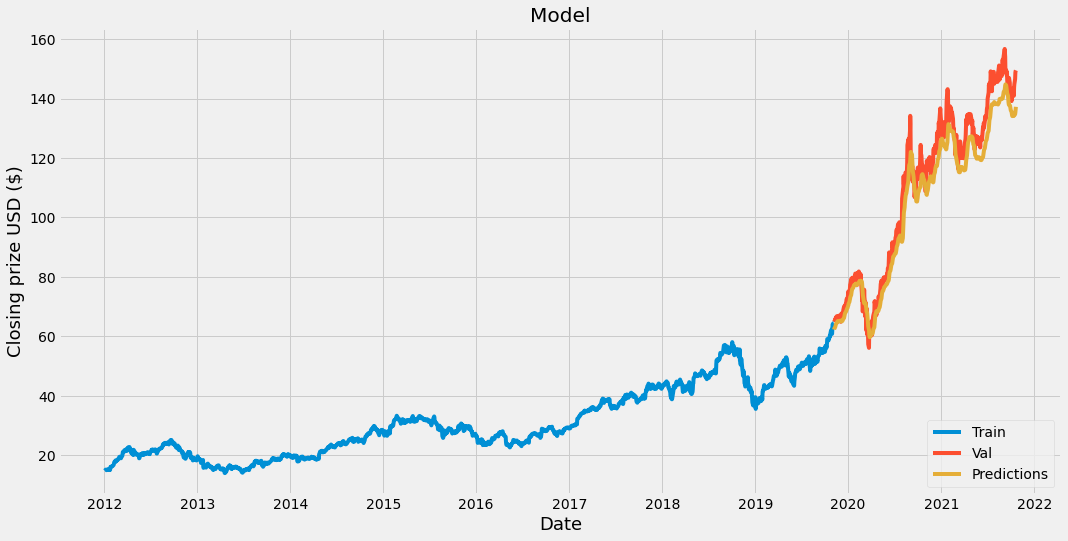

In [25]:
# plot the data
train = data[ : training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing prize USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-11-07,64.857498,62.240635
2019-11-08,65.035004,62.649818
2019-11-11,65.550003,63.023338
2019-11-12,65.489998,63.391384
2019-11-13,66.117500,63.708611
...,...,...
2021-10-15,144.839996,134.365433
2021-10-18,146.550003,134.726852
2021-10-19,148.759995,135.337082


In [27]:
# get the quate 
apple_quate = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-10-26')

# create a new dataframe
new_df = apple_quate.filter(['Close'])

# get the last 60 day closing price values and conert the dataframe to an array
last_60_days = new_df[-60:].values

# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# create an empty list
x_test = []

# append the past 60 days
x_test.append(last_60_days_scaled)

# convert the x_test data set to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
# get the predicted scaled price
pred_price = model.predict(x_test)

# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[139.81194]]


In [34]:
# get the quote
apple_quate2 = web.DataReader('AAPL', data_source='yahoo', start='2021-10-27', end='2021-10-27')
print(apple_quate2['Close'])

Date
2021-10-26    149.320007
2021-10-27    148.850006
Name: Close, dtype: float64


In [31]:
apple_quate2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400,149.320007
2021-10-27,149.729996,148.490005,149.360001,148.850006,51361252,148.850006
